In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

 Verificação do arquivo CHURN_CREDIT.csv

In [14]:
df = pd.read_csv("CHURN_CREDIT.csv", delimiter=';')
df.head(10)

C:\Users\ediloy\AppData\Local\Temp\ipykernel_10076\559473514.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("CHURN_CREDIT.csv", delimiter=';')


,CustomerId,Sobrenome,Credit_Score,Pais,Genero,Idade,Tempo_Credito,Balance,Qtd_Produtos,Possui_Cartao,Membro_Ativo,Salario_Anual,Churn
0,15813451,Fleetwood-Smith,677,Spain,Male,18.0,5,134796.87,2,1.0,0.0,114858.9,0.0
1,15641688,Collier,644,Spain,Female,18.0,7,0.00,1,0.0,1.0,74564.41,0.0
2,15757821,Burgess,641,Spain,Male,18.0,1,0.00,2,0.0,1.0,41542.95,0.0
3,15673180,Onyekaozulu,826,Spain,Male,18.0,2,0.00,2,0.0,1.0,16245.25,0.0
4,15664543,Tuan,774,Spain,Female,18.0,1,185891.54,1,1.0,0.0,175072.41,0.0
5,15673180,Onyekaozulu,688,Spain,Female,18.0,2,0.00,2,1.0,0.0,98349.13,0.0
6,15641688,Collier,803,Spain,Male,18.0,6,0.00,1,0.0,0.0,59645.24,1.0
7,15672940,Yevseyev,578,Spain,Female,18.0,8,71843.15,2,0.0,1.0,112649.22,0.0
8,15694192,Nwankwo,598,Spain,Male,18.0,6,0.00,2,0.0,1.0,173783.38,0.0
9,15585867,Iroawuchi,624,Spain,Female,18.0,6,0.00,2,0.0,1.0,117038.96,0.0


erro > have mixed type > alguma colunas tem mais de 1 tipo de dados.

*   **CustomerID** : Esse é o ID único de cada cliente nosso.
* **Sobrenome**: Essa é bem intuitiva é o sobrenome de cada cliente.
* **Credit_Score**: É o Score de crédito de cada cliente, muito semelhante aquele número que o serasa e outras empresas atribuem para os clientes. **site para entender credit score [Acesse esse link](https://www.investopedia.com/terms/c/credit_score.asp)
* **Pais**: O pais de cada cliente.
* **Idade**: A idade de cada cliente.
* **Tempo_Credito**: Há quanto tempo nosso cliente utiliza produtos de crédito na nossa empresa - ANOS-.
* **Balance**: é o balanço final do nosso cliente, o quanto ele tem em aberto conosco para ainda pagar.
* **Qtde_Produtos**: Quantos produtos ele tem contratado com a gente.
* **Possui_Cartao**: Se ele possui cartão de crédito.
* **Membro_Ativo**: Se atualmente ele é um membro ativo na nossa empresa.
* **Salario_anual**: Salário anual do nosso cliente em dólares por ano.
* **Churn**: Ne nosso cliente deu churn,** 1 para clientes que nos abandonaram e 0 para clientes que ainda estão conosco!**

In [25]:
# verificar os tipo de dados das colunas 
# df.info() tras uma forma melhor e mais completa a informação

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   CustomerId     100000 non-null  int64  
 1   Sobrenome      100000 non-null  object 
 2   Credit_Score   100000 non-null  int64  
 3   Pais           100000 non-null  object 
 4   Genero         99990 non-null   object 
 5   Idade          99794 non-null   float64
 6   Tempo_Credito  100000 non-null  int64  
 7   Balance        100000 non-null  float64
 8   Qtd_Produtos   100000 non-null  int64  
 9   Possui_Cartao  100000 non-null  float64
 10  Membro_Ativo   100000 non-null  float64
 11  Salario_Anual  100000 non-null  object 
 12  Churn          99911 non-null   float64
dtypes: float64(5), int64(4), object(4)
memory usage: 9.9+ MB


Sobrenome > mesmo estando como obejct mas não vai ser util 
Salario_Anual > esta como object e tem que ser inteiro

In [28]:
# astype é utilizado para mudar o tipo da dado da colunas, mas para o tipo de dado que esta na colunas vai retor um erro, pois o dado,
# da coluna não foi tratado.
df['Salario_Anual'] = df['Salario_Anual'].astype(float)

ValueError: could not convert string to float: '38.190.168'

# ValueError: could not convert string to float: '38.190.168', o ponto do valor e

In [46]:
# Removendo os pontos da coluna Salario_Anual
df['Salario_Anual'] = df['Salario_Anual'].str.replace('.', '', regex=False)
# Fazendo a conversão novamente dos dados
df['Salario_Anual'] = df['Salario_Anual'].astype(float)

AttributeError: Can only use .str accessor with string values!

In [44]:
# verificadando se o salario Salario_Anual foi transformado em float
df.dtypes

CustomerId         int64
Sobrenome         object
Credit_Score       int64
Pais              object
Genero            object
Idade            float64
Tempo_Credito      int64
Balance          float64
Qtd_Produtos       int64
Possui_Cartao    float64
Membro_Ativo     float64
Salario_Anual    float64
Churn            float64
dtype: object

In [48]:
# transformar coluna Churn em int 
df['Churn'] = df['Churn'].astype(int)

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

Cannot convert non-finite values (NA or inf) to integer > informa que tem valores infinitos

In [51]:
# verifica sem tem valores nulo no arquivo, True para verdade, False para falso
df.isnull().values.any()

True

In [53]:
# verifica quantos valores nulos em cada colunas.
df.isnull().sum()

CustomerId           0
Sobrenome            0
Credit_Score         0
Pais                 0
Genero              10
Idade              206
Tempo_Credito        0
Balance              0
Qtd_Produtos         0
Possui_Cartao        0
Membro_Ativo         0
Salario_Anual    65536
Churn               89
dtype: int64

Como o arquivo e muito grande vamos verificar a porcentagem de cada valor nulo correspondente.

In [58]:
(df.isnull().sum() / len(df)) * 100 

CustomerId        0.000
Sobrenome         0.000
Credit_Score      0.000
Pais              0.000
Genero            0.010
Idade             0.206
Tempo_Credito     0.000
Balance           0.000
Qtd_Produtos      0.000
Possui_Cartao     0.000
Membro_Ativo      0.000
Salario_Anual    65.536
Churn             0.089
dtype: float64

como a coluna Churn vai ser nosso objetivo o valor do Salario_Anual vai nosso ultimo tratamento pois é 65% dos dados.

In [60]:
# verificando os dados nulos na coluna Genero
df[df['Genero'].isnull()]

,CustomerId,Sobrenome,Credit_Score,Pais,Genero,Idade,Tempo_Credito,Balance,Qtd_Produtos,Possui_Cartao,Membro_Ativo,Salario_Anual,Churn
61074,15601008,Y?an,667,France,NaN,33.0,3,0.00,2,1.0,1.0,NaN,0.0
61075,15757895,Ritchie,642,France,NaN,33.0,4,150507.21,1,1.0,1.0,NaN,0.0
61076,15806983,Moss,646,France,NaN,33.0,3,137148.68,1,1.0,0.0,NaN,0.0
61077,15761340,Bullen,593,France,NaN,33.0,4,0.00,2,1.0,1.0,NaN,0.0
61078,15790594,Nnaife,653,France,NaN,33.0,6,0.00,2,1.0,0.0,NaN,0.0
61079,15679024,Hsia,585,France,NaN,33.0,2,97565.74,1,0.0,0.0,NaN,0.0
61080,15751553,Bellucci,758,France,NaN,33.0,9,119782.77,1,1.0,0.0,NaN,0.0
61081,15592578,Ch'ien,679,France,NaN,33.0,7,107499.24,1,1.0,0.0,NaN,0.0
61082,15592714,Tsao,748,France,NaN,33.0,6,0.00,2,1.0,1.0,NaN,0.0
61083,15578788,Ch'ien,516,France,NaN,33.0,3,0.00,1,1.0,1.0,NaN,0.0


In [62]:
# Excluindo
df.dropna(subset=['Genero'], inplace=True) 

In [66]:
# Verificando os dados nulos
df['Genero'].isnull().sum()

0

In [68]:
# Mesma coisa com coluna idade.
df.dropna(subset=['Idade'], inplace=True) 

In [70]:
df['Idade'].isnull().sum()

0

Agora vamos tratar os dados da coluna Salario_Anual

In [72]:
# Verificando a distribuição dos dados
df['Salario_Anual'].mean()

10280264.388924362

In [74]:
df['Salario_Anual'].median()

10787643.5

Como a mendiana e perto da media, não tem muitos outliers para puxar os dados para fora da curva. 

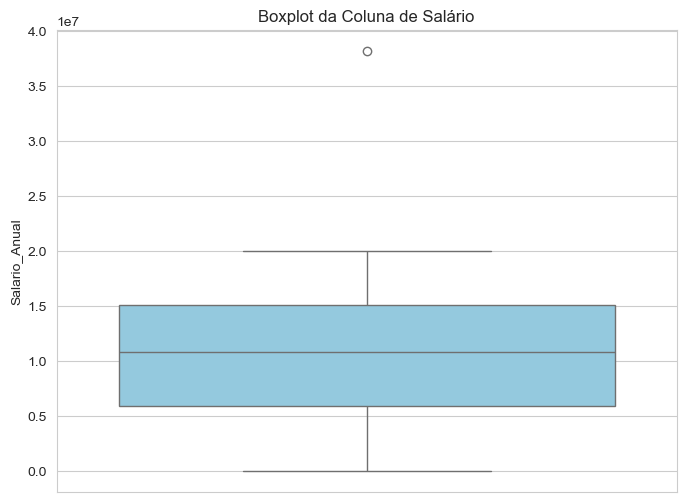

In [76]:
sns.set_style('whitegrid')

# Plota o boxplot da coluna de salário
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='Salario_Anual', color='skyblue')
plt.title('Boxplot da Coluna de Salário')
plt.ylabel('Salario_Anual')
plt.show()

A distribuição dos dados esta muito boa, constado o outlier no grafico perto do valor de 4.0

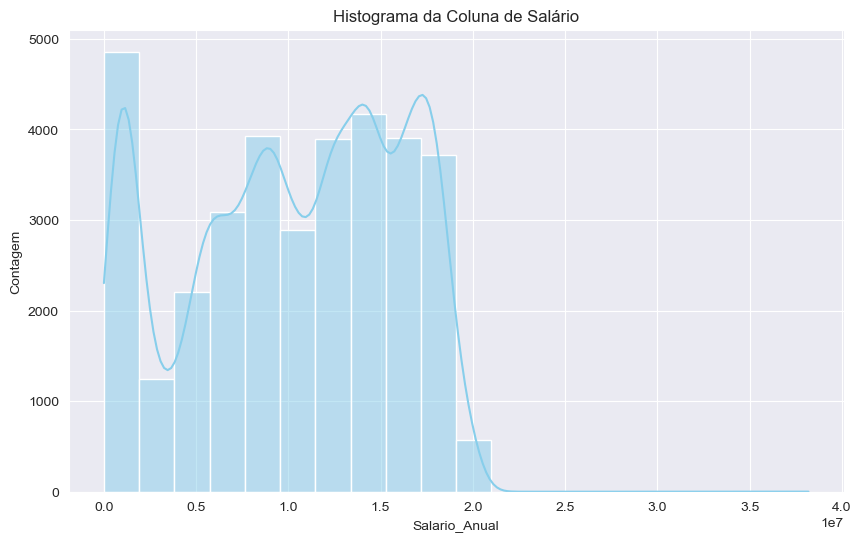

In [78]:
sns.set_style('darkgrid')

# Plotando um histograma dos salários para analisarmos a distribuição dos dados
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Salario_Anual', bins=20, kde=True, color='skyblue')
plt.title('Histograma da Coluna de Salário')
plt.xlabel('Salario_Anual')
plt.ylabel('Contagem')
plt.show()

In [80]:
# retirando o outlier 
salario_abaixo_2m = df[df['Salario_Anual'] < 2000000]
salario_abaixo_2m['Salario_Anual'].median()

1011687.0

comparado com a mediana anterior não teve muita interferencia o tratamento

In [90]:
mediana_salario_abaixo_2milhoes = df[df['Salario_Anual'] < 2000000]['Salario_Anual'].median()
# Substitui os valores faltantes na coluna de salário pela mediana
df['Salario_Anual'] = df['Salario_Anual'].fillna(mediana_salario_abaixo_2milhoes)

In [92]:
df['Salario_Anual'].isnull().sum()

0

In [94]:
salario_abaixo_2m['Salario_Anual'].median()

1011687.0

inicio da verificação do churn 

<Axes: xlabel='Churn', ylabel='Count'>

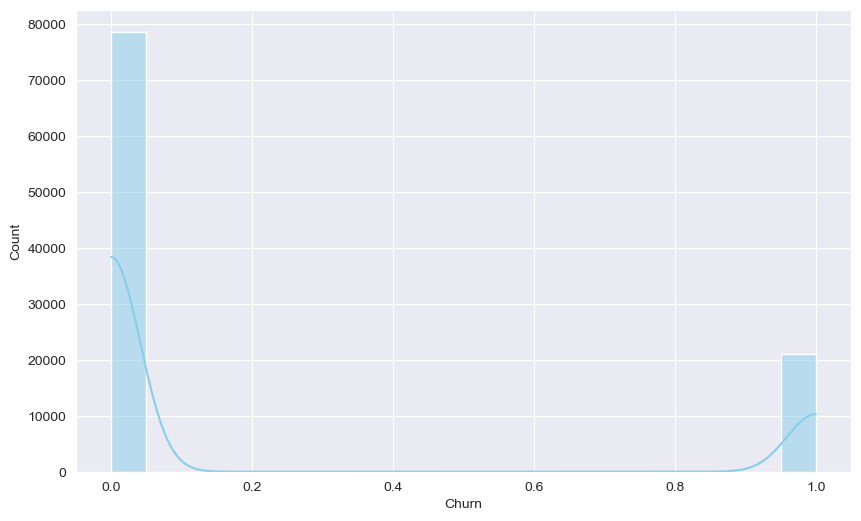

In [96]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Churn', bins=20, kde=True, color='skyblue')

dados com 0 não é churn e 1 é churn, valor de churn e bem baixo.

In [98]:
# Verificar a porcentagem de cada um 
df['Churn'].value_counts(normalize=True) * 100

Churn
0.0    78.854254
1.0    21.145746
Name: proportion, dtype: float64

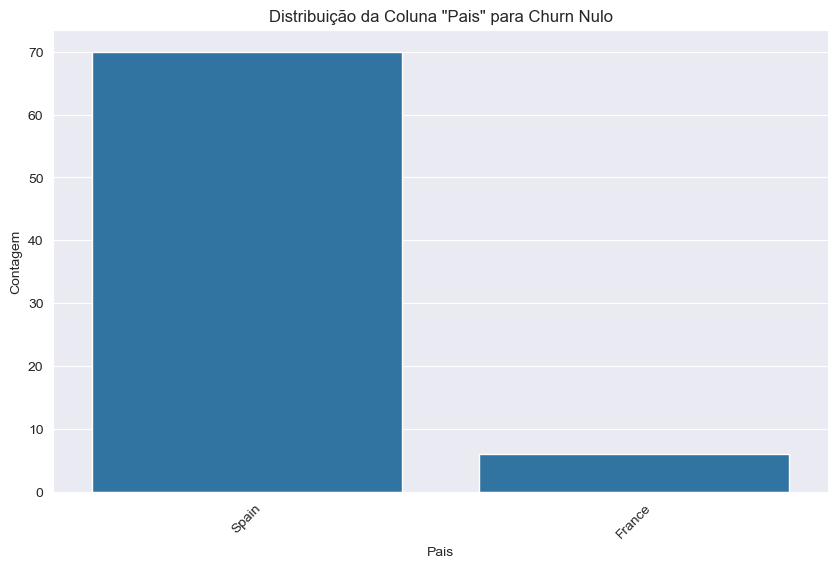

In [100]:
# Seleciona todas as linhas onde a coluna 'Churn' é nula
df_churn_nulo = df[df['Churn'].isnull()]

# Plotando a distribuição dos paises
plt.figure(figsize=(10, 6))
sns.countplot(data=df_churn_nulo, x='Pais')
plt.title('Distribuição da Coluna "Pais" para Churn Nulo')
plt.xlabel('Pais')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()

Spain tem maior valor de nulo e France

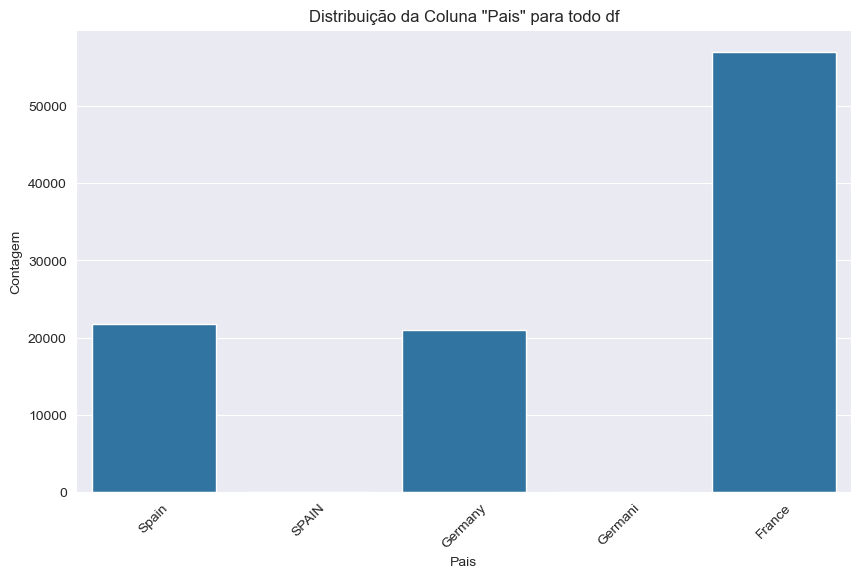

In [102]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Pais')
plt.title('Distribuição da Coluna "Pais" para todo df')
plt.xlabel('Pais')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()

o valor spain de dados de Churn comparados ao outros não vai afetar os dados 

In [104]:
df.dropna(subset=['Churn'], inplace=True)

In [106]:
df['Churn'].isnull().sum()

0

In [108]:
df.isnull().sum()

CustomerId       0
Sobrenome        0
Credit_Score     0
Pais             0
Genero           0
Idade            0
Tempo_Credito    0
Balance          0
Qtd_Produtos     0
Possui_Cartao    0
Membro_Ativo     0
Salario_Anual    0
Churn            0
dtype: int64

Ajuste de erros de digitação e alteração de nomes

In [110]:
df.rename(columns={'Balance': 'Balanco'},inplace=True)

In [112]:
df.head()

,CustomerId,Sobrenome,Credit_Score,Pais,Genero,Idade,Tempo_Credito,Balanco,Qtd_Produtos,Possui_Cartao,Membro_Ativo,Salario_Anual,Churn
0,15813451,Fleetwood-Smith,677,Spain,Male,18.0,5,134796.87,2,1.0,0.0,1011687.0,0.0
1,15641688,Collier,644,Spain,Female,18.0,7,0.00,1,0.0,1.0,1011687.0,0.0
2,15757821,Burgess,641,Spain,Male,18.0,1,0.00,2,0.0,1.0,1011687.0,0.0
3,15673180,Onyekaozulu,826,Spain,Male,18.0,2,0.00,2,0.0,1.0,1011687.0,0.0
4,15664543,Tuan,774,Spain,Female,18.0,1,185891.54,1,1.0,0.0,1011687.0,0.0


In [114]:
df['Pais'].unique()

array(['Spain', 'SPAIN', 'Germany', 'Germani', 'France'], dtype=object)

In [116]:
df['Pais']=df['Pais'].str.upper()

In [118]:
df['Pais'].unique()

array(['SPAIN', 'GERMANY', 'GERMANI', 'FRANCE'], dtype=object)

In [120]:
df['Pais'] = df['Pais'].replace('GERMANI','GERMANY')

In [122]:
df['Pais'].unique()


array(['SPAIN', 'GERMANY', 'FRANCE'], dtype=object)

In [124]:
df['Genero'].unique()

array(['Male', 'Female'], dtype=object)

retirar colunas que não vao ser utilizada para manter integridade da LGPD


In [129]:
df.drop(columns=['Sobrenome'], inplace=True)

In [131]:
df.drop(columns=['CustomerId'],inplace=True)